In [339]:
# (1) importing required libraries



import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [340]:
#importing required dataset


data=pd.read_csv("C:/Users/FARHAN/Downloads/Apps_data+(1).csv")
data.head(3)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   

  Reviews  Size    Installs  Type Price Content Rating  \
0     159   19M     10,000+  Free     0       Everyone   
1     967   14M    500,000+  Free     0       Everyone   
2   87510  8.7M  5,000,000+  Free     0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up  
2               Art & Design    August 1, 2018       1.2.4  4.0.3 and up

In [341]:
# Checking shape of the dataset
data.shape

(10841, 13)

In [342]:
# checking information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<Axes: xlabel='Rating', ylabel='Count'>

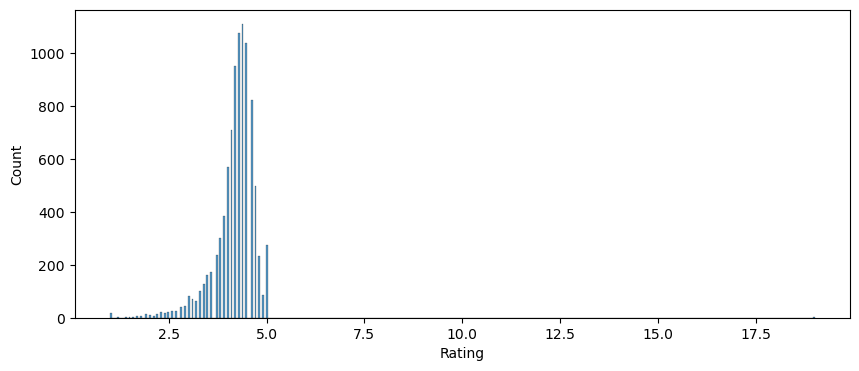

In [343]:
# Visualization



plt.figure(figsize=(10,4))
sns.histplot(data['Rating'])

# frequency of rating is high between 2.5 and 5.0

In [344]:
# Let us analyze the distribution of category
data['Category'].value_counts().plot(kind='bar')
plt.show()

In [345]:
#visualize the  size vs install plot
sns.scatterplot(data, x='Last Updated',y='Installs')
plt.show()

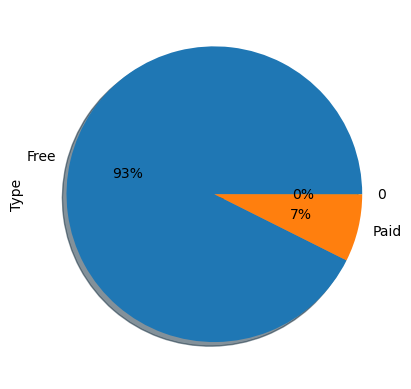

In [346]:
# distribution of type
data['Type'].value_counts().plot(kind='pie',autopct='%1.0f%%', shadow=True)
plt.show()

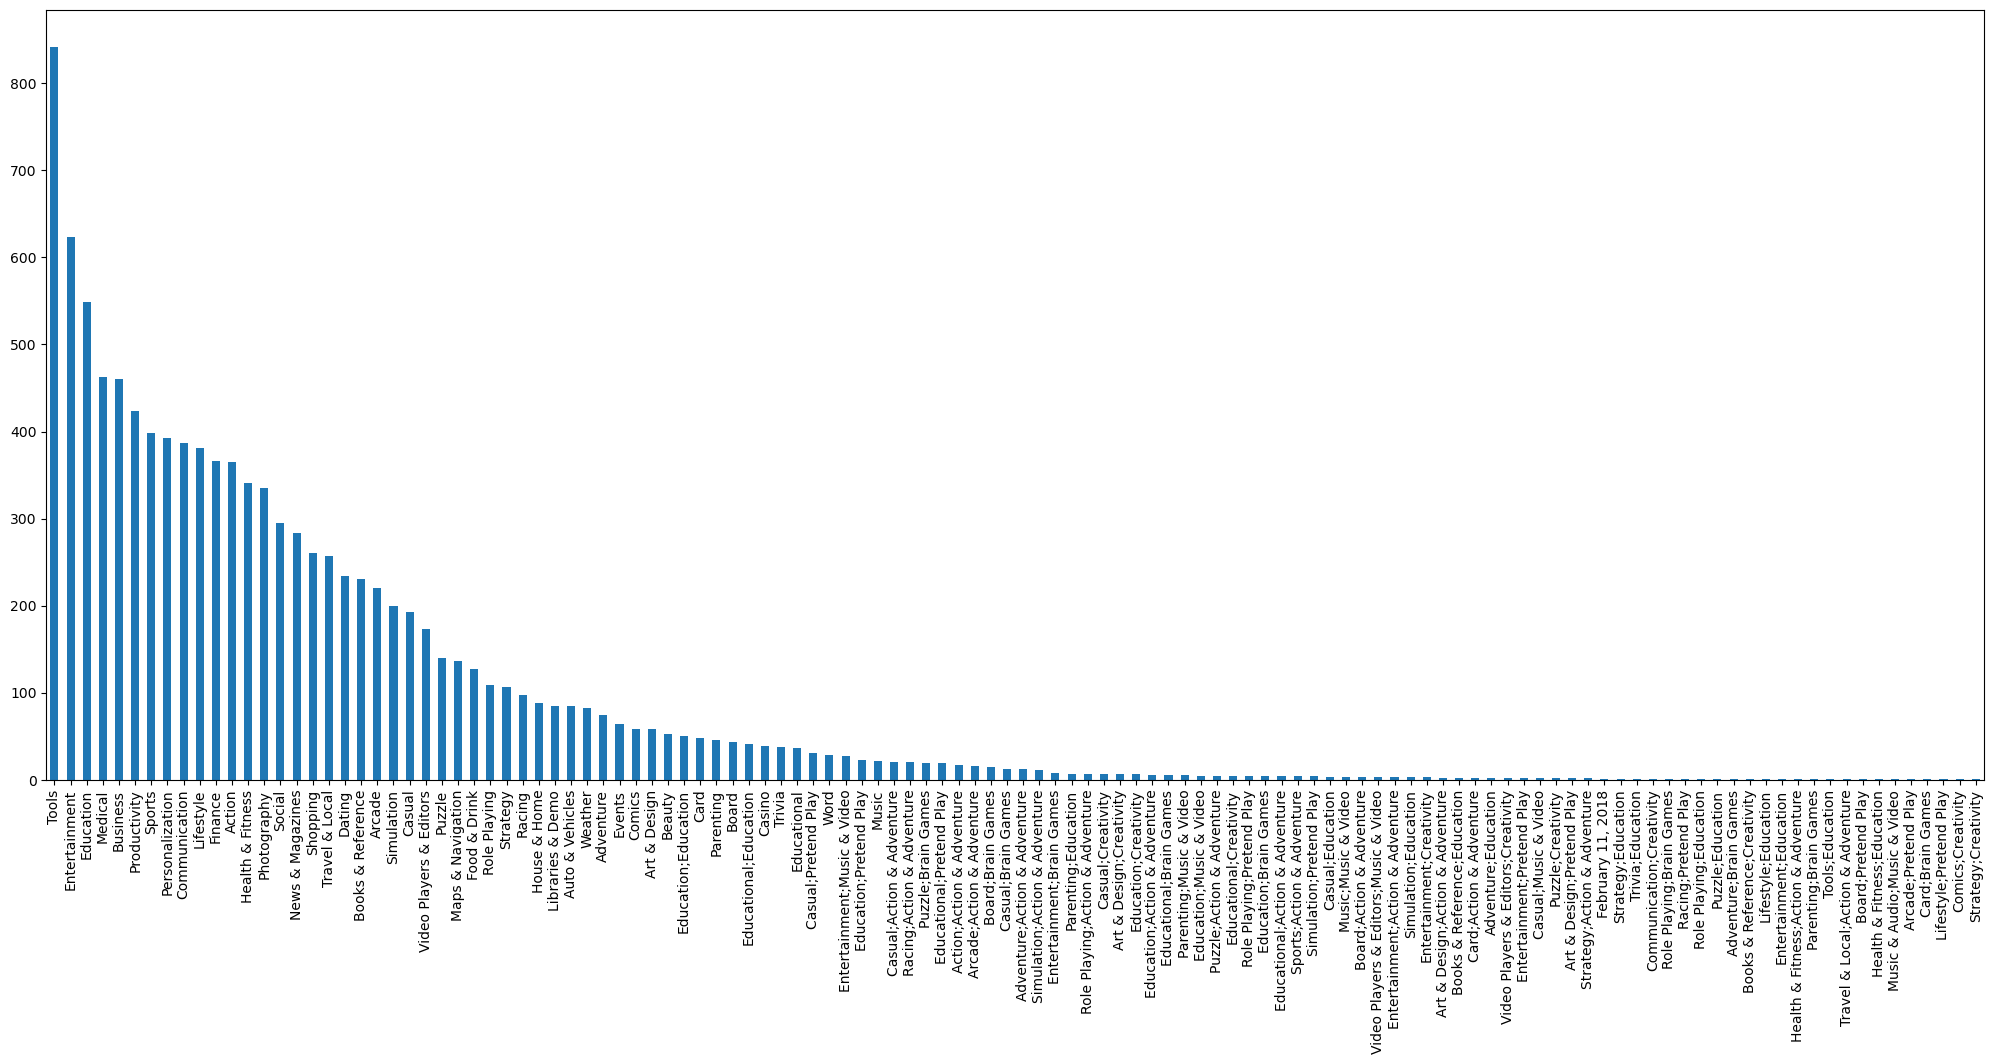

In [347]:
# distribution of genre
plt.figure(figsize=(25,10))
data['Genres'].value_counts().plot(kind='bar')
plt.show()

In [348]:
# (2) Data cleaning, exploratory and analysis

#checking statistical summary of data
data.describe().transpose()


count      mean       std  min  25%  50%  75%   max
Rating  9367.0  4.193338  0.537431  1.0  4.0  4.3  4.5  19.0

In [349]:
#checking overall categorical summary of data
data.describe(include='object').transpose()
# we need to work on all columns for handling datypes, categorical values and missing and duplicate value etc.

count unique                 top   freq
App             10841   9660              ROBLOX      9
Category        10841     34              FAMILY   1972
Reviews         10841   6002                   0    596
Size            10841    462  Varies with device   1695
Installs        10841     22          1,000,000+   1579
Type            10840      3                Free  10039
Price           10841     93                   0  10040
Content Rating  10840      6            Everyone   8714
Genres          10841    120               Tools    842
Last Updated    10841   1378      August 3, 2018    326
Current Ver     10833   2832  Varies with device   1459
Android Ver     10838     33          4.1 and up   2451

In [350]:
# checking duplicate values in the dataset
data.duplicated().value_counts()

False    10358
True       483
dtype: int64

In [351]:
# dropping duplicate values in the dataset

dropped_duplicates = data.drop_duplicates()
dropped_duplicates.duplicated().sum() #checking if duplicates are removed or not

0

In [352]:
print(dropped_duplicates.nunique()) #no of uniques values found
print("total no of unique values found=",dropped_duplicates.nunique().sum()) #total sum of values by columns after dropping duplicates

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64
total no of unique values found= 20685


In [353]:
# shortening its name
df1=dropped_duplicates
print(df1["Category"].value_counts())
#finding a numeric value in cateogry for 1 time that we find invalid so we drop that value

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64


In [354]:
# Drop rows where 'category' is not a string and assigning new variable

df_filtered= df1[df1['Category'].astype(str).str.isnumeric() == False]

# Print the resulting DataFrame
print(df_filtered.head(5))

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [355]:
#checking summary of dataframe
print(df_filtered.info())

#shortening its name by assigning new variable
data3=df_filtered

#checking no of missing values in the dataset
print(data3.isna().sum())

# We found 1465 missing values in 'Reviews' column 
# There is no missing value found in 'Rating' column



<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None
App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                

In [356]:
#dropping rows containing missing values in the column 'Rating';

data3.dropna(subset=['Rating'], inplace=True)
data3.isna().sum()  # no of missing values in the dataset after dropping 

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [358]:
# dropping rest of the missing values which are very less in numbers 
data3.dropna(inplace=True)
data3.isna().sum() # checking if any missing values present or not

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [390]:
# Create a new column 'Rating_category' based on the rating value and assigning high and low value while comparing value 3.5
data3['Rating_category'] = data3['Rating'].apply(lambda x: 'high' if x > 3.5 else 'low')

#counting no of values as per unique elements in the 'Rating_categoy' column
print(data3['Rating_category'].value_counts())
print(data3)

high    6570
low      824
Name: Rating_category, dtype: int64
                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10833                                        Chemin (fr)  BOOKS_AND_REFERENCE   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10840      iHoroscope - 2018 Daily Horoscope & 

<Axes: ylabel='Rating_category'>

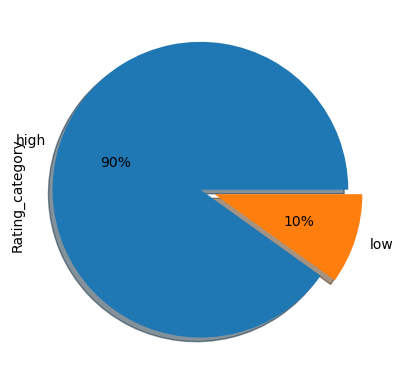

In [360]:
# checking the distribution of 'Rating_category' column

data3['Rating_category'].value_counts().plot(kind='pie',autopct='%1.0f%%',labels=['high','low'] , explode=[0.1,0],shadow=True)

# As per chart, the distribution is imbalanced, high percentage(i.e 90%) found for'high' rating whereas low percentage(i.e.10%) is found for 'low' rating

In [362]:
data3['Reviews'] = pd.to_numeric(data3['Reviews'], errors='coerce') # converting back to numeric

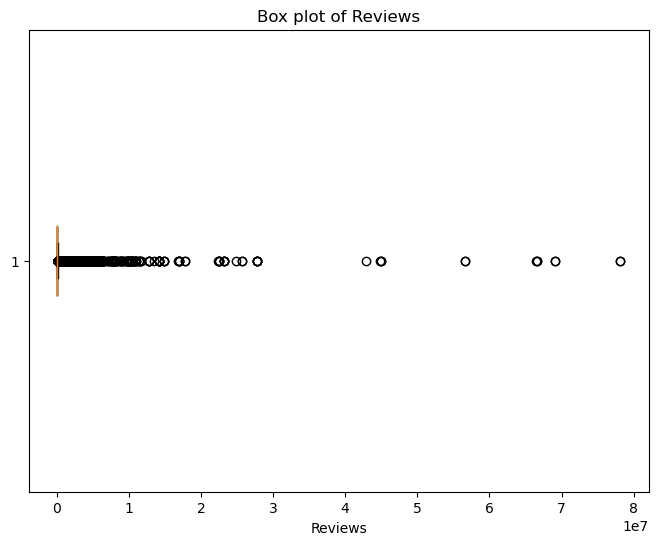

In [363]:
# Check for presence of outliers using box plot
plt.figure(figsize=(8, 6))
plt.boxplot(data3['Reviews'], vert=False)
plt.xlabel('Reviews')
plt.title('Box plot of Reviews')
plt.show()


In [364]:
# Handle outliers using clipping approach
# Clip values below 0 to 0 and above a certain threshold to that threshold (e.g., 99th percentile)
threshold = data3['Reviews'].quantile(0.99)
data3['Reviews'] = data3['Reviews'].clip(lower=0, upper=threshold)

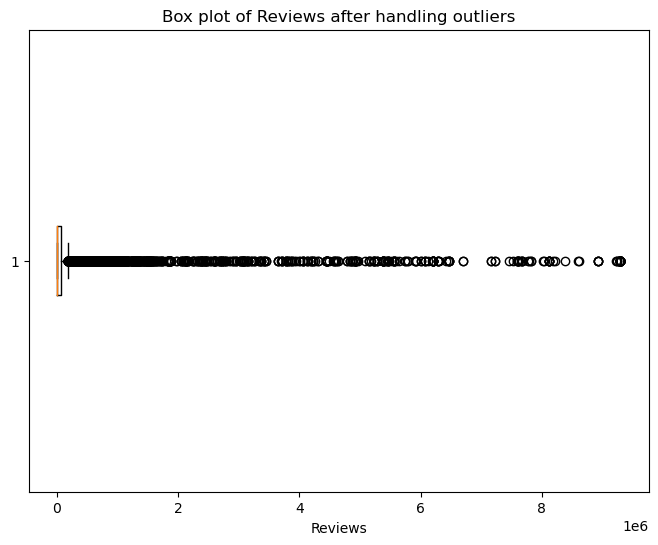

In [365]:
# Check for presence of outliers after handling
plt.figure(figsize=(8, 6))
plt.boxplot(data3['Reviews'], vert=False)
plt.xlabel('Reviews')
plt.title('Box plot of Reviews after handling outliers')
plt.show()

In [366]:
# Replace 'M' with 'e6' and 'K' with 'e3'
data3['Size'] =data3['Size'].str.replace('M', 'e6').str.replace('k', 'e3')

# Drop or impute entries where size='Varies with device'
data3= data3[data3['Size'] != 'Varies with device']

# Convert the column to numeric datatype
data3['Size'] = pd.to_numeric(data3['Size'])

# Print the DataFrame to verify the changes
print(data3.duplicated().sum())

#dropping duplicates
print(data3.drop_duplicates(inplace=True))
print(data3.duplicated().sum())



24
None
0


In [371]:
#checking datatype of 'Size' column
print(data3['Size'].dtypes)
# creating a copy of data3 in sampler
sampler=data3.copy()

float64


In [376]:
# + sign and , are the unwanted characters that can't be used for calculation on numeric values

 # Step 1: Remove '+' sign and commas from the 'Installs' column
sampler['Installs'] = sampler['Installs'].str.replace('[+,]', '', regex=True)

 # Step 2: Convert the column to a numeric datatype
sampler['Installs'] = pd.to_numeric(sampler['Installs'])

# Print the DataFrame to verify the changes
print(sampler)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10833                                        Chemin (fr)  BOOKS_AND_REFERENCE   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating   Reviews    

In [392]:
# Step 1: Remove '$' sign  from the 'Price' column
 sampler['Price'] = sampler['Price'].str.replace('$', '', regex=True)
    
#Step 2: Convert the column to a numeric datatype
 sampler['Price'] = pd.to_numeric(sampler['Price'])

# Print the DataFrame to verify the changes
print(sampler.dtypes)

App                 object
Category            object
Rating             float64
Reviews            float64
Size               float64
Installs             int64
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Rating_category     object
dtype: object


In [396]:
# (3) Data Preparation for model building

# Drop less important columns from the DataFrame 
sampler.drop(columns=['App','Rating', 'Last Updated', 'Current Ver', 'Android Ver'], inplace=True)

# Print the DataFrame to verify the changes
print(sampler)

                  Category   Reviews        Size  Installs  Type  Price  \
0           ART_AND_DESIGN     159.0  19000000.0     10000  Free    0.0   
1           ART_AND_DESIGN     967.0  14000000.0    500000  Free    0.0   
2           ART_AND_DESIGN   87510.0   8700000.0   5000000  Free    0.0   
3           ART_AND_DESIGN  215644.0  25000000.0  50000000  Free    0.0   
4           ART_AND_DESIGN     967.0   2800000.0    100000  Free    0.0   
...                    ...       ...         ...       ...   ...    ...   
10833  BOOKS_AND_REFERENCE      44.0    619000.0      1000  Free    0.0   
10834               FAMILY       7.0   2600000.0       500  Free    0.0   
10836               FAMILY      38.0  53000000.0      5000  Free    0.0   
10837               FAMILY       4.0   3600000.0       100  Free    0.0   
10840            LIFESTYLE  398307.0  19000000.0  10000000  Free    0.0   

      Content Rating                     Genres Rating_category  
0           Everyone             

In [398]:
# dropping 'Genres' column from the dataframe
sampler.drop(columns=['Genres'], inplace=True)

In [406]:
print(sampler)
print(sampler.isna().sum())

                  Category   Reviews        Size  Installs  Type  Price  \
0           ART_AND_DESIGN     159.0  19000000.0     10000  Free    0.0   
1           ART_AND_DESIGN     967.0  14000000.0    500000  Free    0.0   
2           ART_AND_DESIGN   87510.0   8700000.0   5000000  Free    0.0   
3           ART_AND_DESIGN  215644.0  25000000.0  50000000  Free    0.0   
4           ART_AND_DESIGN     967.0   2800000.0    100000  Free    0.0   
...                    ...       ...         ...       ...   ...    ...   
10833  BOOKS_AND_REFERENCE      44.0    619000.0      1000  Free    0.0   
10834               FAMILY       7.0   2600000.0       500  Free    0.0   
10836               FAMILY      38.0  53000000.0      5000  Free    0.0   
10837               FAMILY       4.0   3600000.0       100  Free    0.0   
10840            LIFESTYLE  398307.0  19000000.0  10000000  Free    0.0   

      Content Rating Rating_category  
0           Everyone            high  
1           Everyone 

In [411]:
# For the target column 'Rating_category' Replace 'high' as 1 and 'low' as 0
sampler['Rating_category']=sampler['Rating_category'].replace('high', '1').str.replace('low', '0')
# checking the replacement values by counting per '1' and'0'
print(sampler['Rating_category'].value_counts())

1    6570
0     824
Name: Rating_category, dtype: int64


In [413]:
# Again check datatypes of columns
sampler.dtypes

Category            object
Reviews            float64
Size               float64
Installs             int64
Type                object
Price              float64
Content Rating      object
Rating_category     object
dtype: object

In [417]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Define columns to encode
columns_to_encode = ['Category', 'Type', 'Content Rating', 'Rating_category']

# Iterate over columns and perform label encoding
for column in columns_to_encode:
    sampler[column] = label_encoder.fit_transform(sampler[column])

# Print the encoded Data Frame
print(sampler)

       Category   Reviews        Size  Installs  Type  Price  Content Rating  \
0             0     159.0  19000000.0     10000     0    0.0               1   
1             0     967.0  14000000.0    500000     0    0.0               1   
2             0   87510.0   8700000.0   5000000     0    0.0               1   
3             0  215644.0  25000000.0  50000000     0    0.0               4   
4             0     967.0   2800000.0    100000     0    0.0               1   
...         ...       ...         ...       ...   ...    ...             ...   
10833         3      44.0    619000.0      1000     0    0.0               1   
10834        11       7.0   2600000.0       500     0    0.0               1   
10836        11      38.0  53000000.0      5000     0    0.0               1   
10837        11       4.0   3600000.0       100     0    0.0               1   
10840        18  398307.0  19000000.0  10000000     0    0.0               1   

       Rating_category  
0             

In [447]:
# final checking if any missing values still present there
print(sampler.isna().sum())
# final checking of the shape of dataframe 
print(sampler.shape)

Category           0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Rating_category    0
dtype: int64
(7394, 8)


In [421]:
 # Seperate the target and independent features
X = sampler.drop('Rating_category',axis=1)
y = sampler['Rating_category'] 
    

In [423]:
# Split the dataset into train and test. (i.e 70% - 30%)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(5175, 7) (2219, 7)
(5175,) (2219,)


In [425]:
# Standardize the data
ss = StandardScaler()

X_train.iloc[:,:] = ss.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = ss.transform(X_test.iloc[:,:])

In [427]:
## Just checking few row after scaling
X_train.head(2)

Category   Reviews      Size  Installs      Type     Price  \
6128   1.518851 -0.218271 -0.732758 -0.177207 -0.283506 -0.063984   
10172 -1.558455 -0.212838  0.139722 -0.147929 -0.283506 -0.063984   

       Content Rating  
6128        -0.464141  
10172       -0.464141

In [429]:
# (4) Model training, and testing
# Model Building
# Classification
# defining a function


def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs
    
    model.fit(X_train, y_train)   # fit the model with the train data

    pred = model.predict(X_test)  # make predictions on the test set
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print('\033[1;46;13m Train accuracy: \033[0;0m',train_score)
    print('\033[1;46;13m Test accuracy: \033[0;0m',test_score)
    print('\n')
    print('\033[1;46;13m Confusion matrix: \033[0;0m','\n',confusion_matrix(y_test, pred))
    print('\n')
    print('\033[1;46;13m Classification report: \033[0;0m','\n',classification_report(y_test, pred))

In [431]:
# instantiate the classifier
dt = DecisionTreeClassifier()

# calling the function
fit_n_print(dt, X_train, X_test, y_train, y_test)

 Train accuracy:  0.9998067632850242
 Test accuracy:  0.8102748986029743


 Confusion matrix:  
 [[  64  195]
 [ 226 1734]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.22      0.25      0.23       259
           1       0.90      0.88      0.89      1960

    accuracy                           0.81      2219
   macro avg       0.56      0.57      0.56      2219
weighted avg       0.82      0.81      0.81      2219



In [433]:
# Random Forest Classifier

# instanstiate the random forest classifier

rf = RandomForestClassifier()

# calling the function
fit_n_print(rf, X_train, X_test, y_train, y_test)

 Train accuracy:  0.9996135265700483
 Test accuracy:  0.8765209553853087


 Confusion matrix:  
 [[  27  232]
 [  42 1918]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.39      0.10      0.16       259
           1       0.89      0.98      0.93      1960

    accuracy                           0.88      2219
   macro avg       0.64      0.54      0.55      2219
weighted avg       0.83      0.88      0.84      2219



In [434]:
# Bagging Classifier



# instanstiate Bagging classifier

bg = BaggingClassifier()



# call the function

fit_n_print(bg, X_train, X_test, y_train, y_test)

 Train accuracy:  0.9934299516908213
 Test accuracy:  0.8557908968003605


 Confusion matrix:  
 [[  34  225]
 [  95 1865]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.26      0.13      0.18       259
           1       0.89      0.95      0.92      1960

    accuracy                           0.86      2219
   macro avg       0.58      0.54      0.55      2219
weighted avg       0.82      0.86      0.83      2219



In [436]:
# Gradient Boosting



# instanstiate the GB classifeir

gb = GradientBoostingClassifier()

# call the function

fit_n_print(gb, X_train, X_test, y_train, y_test)

 Train accuracy:  0.8970048309178744
 Test accuracy:  0.8805768364127986


 Confusion matrix:  
 [[   5  254]
 [  11 1949]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.31      0.02      0.04       259
           1       0.88      0.99      0.94      1960

    accuracy                           0.88      2219
   macro avg       0.60      0.51      0.49      2219
weighted avg       0.82      0.88      0.83      2219



In [439]:
# Ada Boosting



# instanstiate ada boosting classifier

ab = AdaBoostClassifier()


# call the function

fit_n_print(ab, X_train, X_test, y_train, y_test)

 Train accuracy:  0.890048309178744
 Test accuracy:  0.8828301036502929


 Confusion matrix:  
 [[   3  256]
 [   4 1956]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.43      0.01      0.02       259
           1       0.88      1.00      0.94      1960

    accuracy                           0.88      2219
   macro avg       0.66      0.50      0.48      2219
weighted avg       0.83      0.88      0.83      2219



In [441]:
 # Stacking



# instantiate stacking classifier

estimators = [('dt', dt), ('rf', rf), ('bg', bg), ('gb', gb), ('ab', ab)]

clf = StackingClassifier(estimators = estimators, final_estimator = rf)



# calling the function

fit_n_print(clf, X_train, X_test, y_train, y_test)

 Train accuracy:  0.9584541062801932
 Test accuracy:  0.8778729157278053


 Confusion matrix:  
 [[  10  249]
 [  22 1938]]


 Classification report:  
               precision    recall  f1-score   support

           0       0.31      0.04      0.07       259
           1       0.89      0.99      0.93      1960

    accuracy                           0.88      2219
   macro avg       0.60      0.51      0.50      2219
weighted avg       0.82      0.88      0.83      2219




# (5)  Conclusion and improvisation


# Conclusions:

(1) Based on the provided accuracies, the model with the highest test accuracy is the Random Forest Classifier with a test accuracy of 0.8765. Therefore, the Random Forest Classifier is the model with the best performance on the test data among the options provided.

(2) Random Forest, Gradient Boosting, and AdaBoost classifiers perform relatively well compared to others, with Gradient Boosting having the highest test accuracy.

(3) Decision Tree Classifier seems to be overfitting as the training accuracy is very high compared to the test accuracy.

(4) Stacking Classifier shows promising results but needs further investigation to ensure it's not overfitting.

(5) Improvements can be made by tuning hyperparameters, feature selection, and feature engineering.

(6) Ensemble methods like Random Forest, Gradient Boosting, and AdaBoost generally perform well and can be further explored and optimized.

(7) Cross-validation and grid search can help in fine-tuning the models and selecting the best hyperparameters.





# Steps to Improve Accuracy:

(1) Feature Engineering: Explore and create new features that might capture important patterns in the data.

(2) Hyperparameter Tuning: Fine-tune the hyperparameters of models using techniques like grid search or randomized search.

(3)Ensemble Methods: Experiment with different ensemble methods and stacking techniques to combine the strengths of multiple models.

(4)Regularization: Apply regularization techniques to prevent overfitting, especially for models like Decision Trees and Gradient Boosting.

(5) Data Cleaning: Ensure thorough data cleaning to handle missing values, outliers, and other inconsistencies in the data.

(6) Cross-validation: Use cross-validation to get a better estimate of the model's performance and reduce the risk of overfitting.

(7) Model Selection: Experiment with different algorithms and architectures to find the best model for the given problem.

(8) Feature Selection: Identify and select the most relevant features to improve model performance and reduce complexity.